## 过拟合和欠拟合

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
np.random.seed(666)
x = np.random.uniform(-3.0, 3.0, size=100)
X = x.reshape(-1, 1)
y = 0.5 * x**2 + x + 2 + np.random.normal(0, 1, size=100)

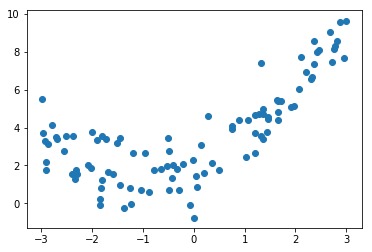

In [3]:
plt.scatter(x, y)
plt.show()

### 使用线性回归

In [4]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.score(X, y)

0.4953707811865009

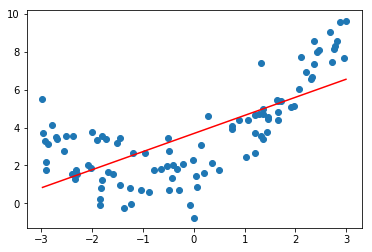

In [5]:
y_predict = lin_reg.predict(X)
plt.scatter(x, y)
plt.plot(np.sort(x), y_predict[np.argsort(x)], color='r')
plt.show()

In [6]:
from sklearn.metrics import mean_squared_error

y_predict = lin_reg.predict(X)
mean_squared_error(y, y_predict)

3.0750025765636577

### 使用多项式回归

In [7]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler

def PolynomialRegression(degree):
    return Pipeline([
        ("poly", PolynomialFeatures(degree=degree)),
        ("std_scaler", StandardScaler()),
        ("lin_reg", LinearRegression())
    ])

In [8]:
poly2_reg = PolynomialRegression(degree=2)
poly2_reg.fit(X, y)

Pipeline(memory=None,
     steps=[('poly', PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)), ('std_scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('lin_reg', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False))])

In [9]:
y2_predict = poly2_reg.predict(X)
mean_squared_error(y, y2_predict)

1.0987392142417856

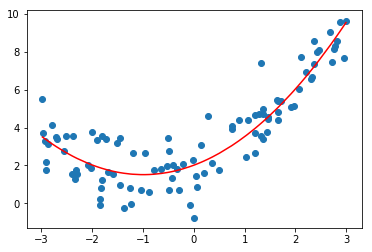

In [10]:
plt.scatter(x, y)
plt.plot(np.sort(x), y2_predict[np.argsort(x)], color='r')
plt.show()

In [12]:
poly10_reg = PolynomialRegression(degree=10)
poly10_reg.fit(X, y)

y10_predict = poly10_reg.predict(X)
mean_squared_error(y, y10_predict)

1.0508466763764204

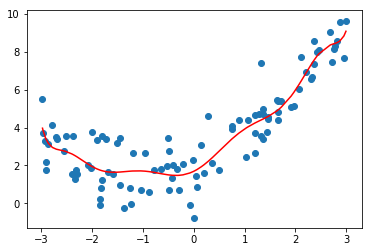

In [13]:
plt.scatter(x, y)
plt.plot(np.sort(x), y10_predict[np.argsort(x)], color='r')
plt.show()

In [14]:
poly100_reg = PolynomialRegression(degree=100)
poly100_reg.fit(X, y)

y100_predict = poly100_reg.predict(X)
mean_squared_error(y, y100_predict)

0.6875653386073417

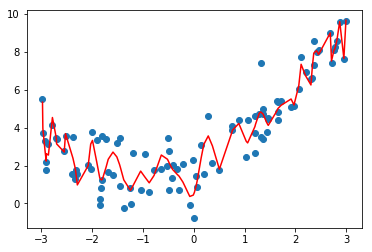

In [15]:
plt.scatter(x, y)
plt.plot(np.sort(x), y100_predict[np.argsort(x)], color='r')
plt.show()

In [18]:
X_plot = np.linspace(-3, 3, 100).reshape(100, 1)
y_plot = poly100_reg.predict(X_plot)
print(X_plot)

[[-3.        ]
 [-2.93939394]
 [-2.87878788]
 [-2.81818182]
 [-2.75757576]
 [-2.6969697 ]
 [-2.63636364]
 [-2.57575758]
 [-2.51515152]
 [-2.45454545]
 [-2.39393939]
 [-2.33333333]
 [-2.27272727]
 [-2.21212121]
 [-2.15151515]
 [-2.09090909]
 [-2.03030303]
 [-1.96969697]
 [-1.90909091]
 [-1.84848485]
 [-1.78787879]
 [-1.72727273]
 [-1.66666667]
 [-1.60606061]
 [-1.54545455]
 [-1.48484848]
 [-1.42424242]
 [-1.36363636]
 [-1.3030303 ]
 [-1.24242424]
 [-1.18181818]
 [-1.12121212]
 [-1.06060606]
 [-1.        ]
 [-0.93939394]
 [-0.87878788]
 [-0.81818182]
 [-0.75757576]
 [-0.6969697 ]
 [-0.63636364]
 [-0.57575758]
 [-0.51515152]
 [-0.45454545]
 [-0.39393939]
 [-0.33333333]
 [-0.27272727]
 [-0.21212121]
 [-0.15151515]
 [-0.09090909]
 [-0.03030303]
 [ 0.03030303]
 [ 0.09090909]
 [ 0.15151515]
 [ 0.21212121]
 [ 0.27272727]
 [ 0.33333333]
 [ 0.39393939]
 [ 0.45454545]
 [ 0.51515152]
 [ 0.57575758]
 [ 0.63636364]
 [ 0.6969697 ]
 [ 0.75757576]
 [ 0.81818182]
 [ 0.87878788]
 [ 0.93939394]
 [ 1.     

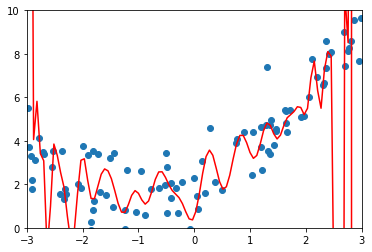

In [17]:
plt.scatter(x, y)
plt.plot(X_plot[:,0], y_plot, color='r')
plt.axis([-3, 3, 0, 10])
plt.show()

### train test split的意义

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=666)

In [20]:
lin_reg.fit(X_train, y_train)
y_predict = lin_reg.predict(X_test)
mean_squared_error(y_test, y_predict)

2.2199965269396573

In [21]:
poly2_reg.fit(X_train, y_train)
y2_predict = poly2_reg.predict(X_test)
mean_squared_error(y_test, y2_predict)

0.8035641056297901

In [22]:
poly10_reg.fit(X_train, y_train)
y10_predict = poly10_reg.predict(X_test)
mean_squared_error(y_test, y10_predict)

0.9212930722150686

In [23]:
poly100_reg.fit(X_train, y_train)
y100_predict = poly100_reg.predict(X_test)
mean_squared_error(y_test, y100_predict)

14075780270.824253